In [1]:
# !apt install -y cm-super
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng
# !pip install -U matplotlib

In [2]:
import os
import math
import numpy as np
import time
from ipywidgets import interact, fixed
from tqdm.notebook import tqdm

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
print("Using torch", torch.__version__)

Using torch 1.9.1


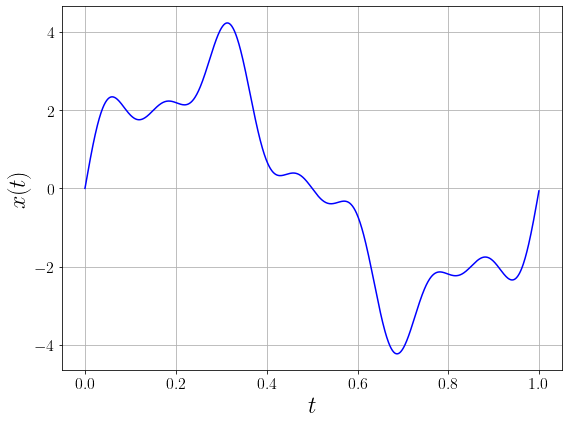

In [5]:
# sampling rate
sampling_rate = 1024
# sampling interval
dt = 1.0/sampling_rate
t = np.arange(0, 1, dt)
x = 0
freq = 1.
x += 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5 * np.sin(2*np.pi*freq*t)

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.plot(t, x, 'b')
ax.grid('on')
# ax.axis('equal')
# ax.set_xlim(-0.00, 2.00)
# ax.set_ylim(+0.50, 3.50)
ax.set_xlabel("$t$", fontsize=24)
ax.set_ylabel("$x(t)$", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

/tmp/ipykernel_1882335/3278675025.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")


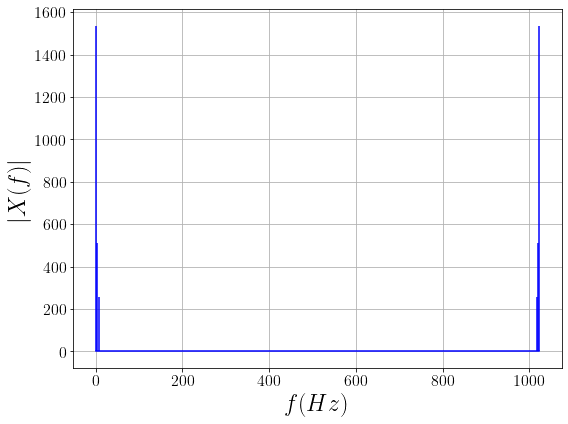

/tmp/ipykernel_1882335/3278675025.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")


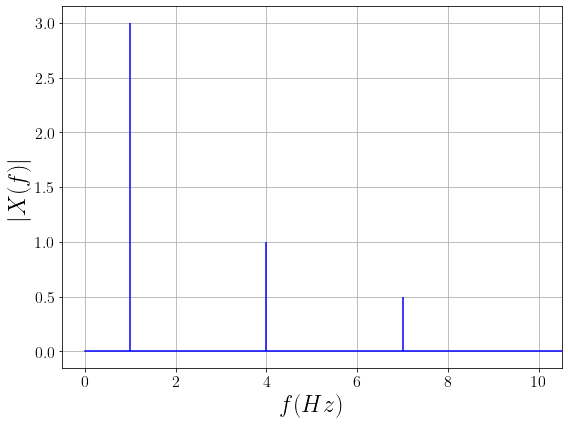

In [6]:
X = np.fft.fft(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N / sampling_rate
freq = n/T 

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
ax.grid('on')
ax.set_xlabel("$f (Hz)$", fontsize=24)
ax.set_ylabel("$|X(f)|$", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside
# X_oneside[0] = X_oneside[0] / 2 # Due to periodic wrap around

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
ax.grid('on')
ax.set_xlabel("$f (Hz)$", fontsize=24)
ax.set_ylabel("$|X(f)|$", fontsize=24)
ax.set_xlim(-0.50, 10.50)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

In [7]:
order = np.argsort(np.abs(X[:N // 2]))[::-1]
freqs = np.fft.fftfreq(N)
def _plot_basis1d(basis=0):
    subset = np.zeros_like(X)
    f = order[basis]
    subset[f] = X[f]
    subset[-f] = X[-f]
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.plot(t, np.real(np.fft.ifft(subset)), color='b')
    plt.title("$Basis @ {}Hz$".format(len(freqs) * freqs[f]), fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=12)

    for f in order[:basis]:
        subset[f] = X[f]
        subset[-f] = X[-f]

    plt.subplot(122)
    plt.plot(t, np.real(np.fft.ifft(subset)), color='b')
    plt.plot(t, x, color='g')
    plt.title("$Reconstruction$", fontsize=24)
    plt.show()

interact(_plot_basis1d, basis=(0, 2))

interactive(children=(IntSlider(value=0, description='basis', max=2), Output()), _dom_classes=('widget-interac…

<function __main__._plot_basis1d(basis=0)>